<a href="https://colab.research.google.com/github/ZuckermanLab/coding2024/blob/main/Tokens_and_LLMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Local Large Language Models

The first
 thing we need to do is get an API access key from huggingface.com. After creating an acount on Hugging Face, go to https://huggingface.co/google/gemma-2b to accept the T&C for the Gemma model. Next, go to Settings > Access Tokens and create a new "Read" token. Keep this page up as we will need to re-enter this token later.

In [ ]:
from huggingface_hub import login
login()

# Tokens and the Tokenizer
(I am stealing a lot of this from the legend Andrej Karpathy)
https://youtu.be/zduSFxRajkE?si=J8cpPNyeJ__6KWug

In [ ]:
list("hello world")

In [ ]:
"hello world".split(" ")

https://docs.python.org/3/library/stdtypes.html#text-sequence-type-str

https://en.wikipedia.org/wiki/Unicode


In [ ]:
ords = [ord(c) for c in "hello world"]
print(ords)

In [ ]:
"hello world".encode('utf-8')

In [ ]:
list("hello world".encode('utf-8'))

In [ ]:
assert len(list("hello world".encode('utf-8'))) == len(list("hello world"))

In [ ]:
list("hello world 🤗")

In [ ]:
[ord(c) for c in "hello world 🤗"]

In [ ]:
"hello world 🤗".encode('utf-8')

In [ ]:
0xf0

In [ ]:
b"hello world 🤗"

In [ ]:
type(b"hello world")

https://docs.python.org/3/library/stdtypes.html#bytes-objects

In [ ]:
assert len(list("hello world 🤗".encode('utf-8'))) == len(list("hello world 🤗"))

In [ ]:
list("hello world 🤗".encode('utf-8'))

In [ ]:
list("🤗".encode('utf-8'))

https://en.wikipedia.org/wiki/Byte_pair_encoding

https://huggingface.co/docs/transformers/main/en/model_doc/gemma

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("google/gemma-2b")

In [ ]:
tokenizer("hello world 🤗")

In [ ]:
for token in tokenizer("hello world🤗")['input_ids']:
  print(tokenizer.decode(token))

In [ ]:
def tokenize(text):
  return tokenizer(text, return_tensors="pt")['input_ids']

In general, we can think of one token being equal to one word, but this is not always the case. You can see that "tokenize" gets tokenized into 2 tokens, "< bos >" (token ID 2) and "tokenize" (token ID 129374). However the word "tokenized" gets split into 3 tokens, with the suffix "-ized" being assigned its own token. This is much more efficient for the model because instead of having to learn the words "token", "tokenized", and "tokenizing" seperately, it can instead learn the word "token", and the suffixes "-ized" and "-izing", and can then use its knowledge of these suffixes on other root words like "capitalized".

In [ ]:
tokenize(['tokenize']).shape

In [ ]:
for t in tokenize('tokenize')[0]:
  print({t}, tokenizer.decode(t))

In [ ]:
for t in tokenize('tokenized')[0]:
  print({t}, tokenizer.decode(t))

In [ ]:
for t in tokenize('tokenizing')[0]:
  print({t}, tokenizer.decode(t))

In [ ]:
for t in tokenize('capitalized')[0]:
  print({t}, tokenizer.decode(t))

# Loading and Running the Google Gemma 2B Base Model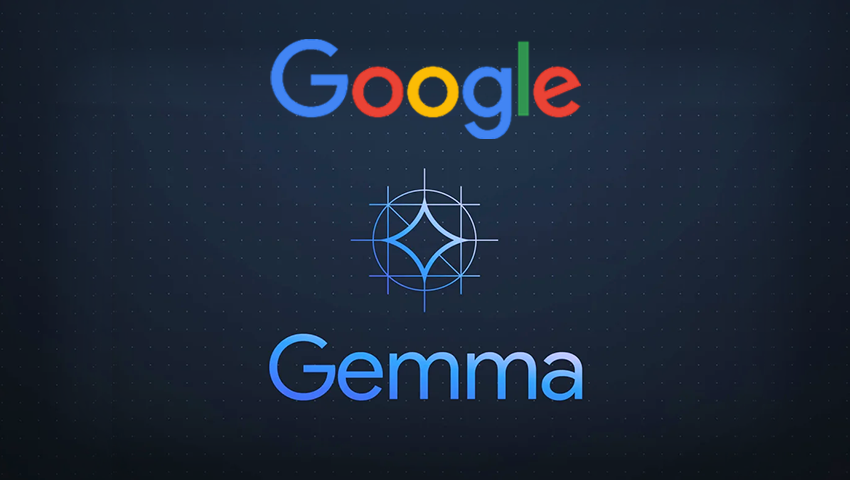

Now we can test out the `generate` method of our model. For this, we will pass in our tokenized input prompt (`input_ids`) and also specify the maximum amount of new tokens we want the model to generate. We can see that the output is a new tensor containing 29 tokens, our 9 input tokens plus the 20 new generated tokens.

$$P(x_t \mid x_0, x_1, \ldots, x_{t-1})$$

https://huggingface.co/google/gemma-2b

In [ ]:
from transformers import AutoModelForCausalLM
model = AutoModelForCausalLM.from_pretrained("google/gemma-2b")

In [ ]:
query = "What is the capital of Oregon?"

In [ ]:
max_new_tokens = 20
output_ids = model.generate(tokenize(query), max_new_tokens=max_new_tokens)

In [ ]:
output_ids

now print out the decoded tokens

In [ ]:
#print decoded tokens (hint, check output.shape)

https://lacker.io/ai/2020/07/06/giving-gpt-3-a-turing-test.html

https://arxiv.org/pdf/2005.14165

## Implementing the Generate() method ourselves

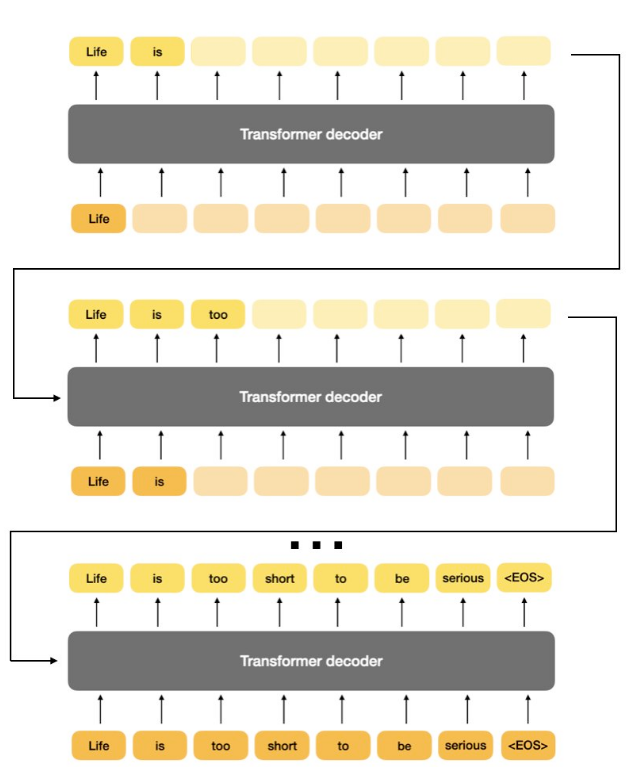

In reality when we call the `generate()` method of our model, we are really running the model multiple times in a for loop. At each step we are taking the next word predicted by the model, adding it to our input, and running the model again.

In [ ]:
query = "What is the capital of Oregon?"

In [ ]:
tokens = tokenize(query)

In [ ]:
output = model.forward(tokens)

Each time we pass our input through the model (the "forward pass"), the output we get is called the "logits", which is a set of scores for each token ID in the model's vocabulary, which for Gemma is 256,000 different tokens.

In [ ]:
output['logits'].shape

In [ ]:
for i in range(256000):
  print(tokenizer.decode(i))

In [ ]:
#get output logits of last input token
def get_next_token(output):
  pass
  #return predicted token id of last input token

In [ ]:
get_next_token(output)

In [ ]:
tokenizer.decode(get_next_token(output))

In [ ]:
print('\n \n')

Finish the code to generate the output text token-by-token. Hint, you need to add two lines of code

In [ ]:
import torch

In [ ]:
inputs = tokens.clone()
for i in range(max_new_tokens):
  output =
  next_token =
  #concatenate the inputs and the next_token
  inputs = torch.cat((inputs, torch.tensor([[next_token]])), dim=1)
  output_text = tokenizer.decode(inputs[0][9:])
  print(output_text)